In [1]:
import os
from sympy import *
import pandas as pd
import numpy as np
import scipy.fftpack
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("seaborn-paper")

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

## Canvas palette

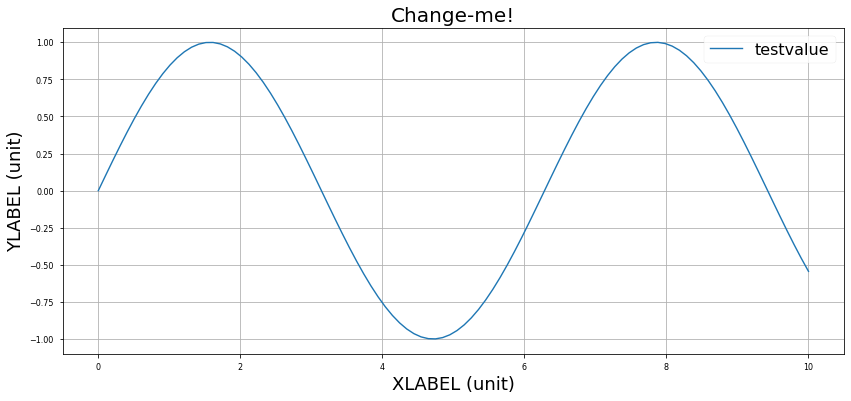

In [2]:
#Canvas for single plot
x = np.linspace(0,10,100)
y = np.sin(x)
plt.figure(figsize=[14,6])
plt.grid(True)
plt.title("Change-me!",fontsize=20)
plt.plot(x,y,label="testvalue")
plt.legend(fontsize=16)
plt.xlabel("XLABEL (unit)",fontsize=18)
plt.ylabel("YLABEL (unit)",fontsize=18)
plt.show()

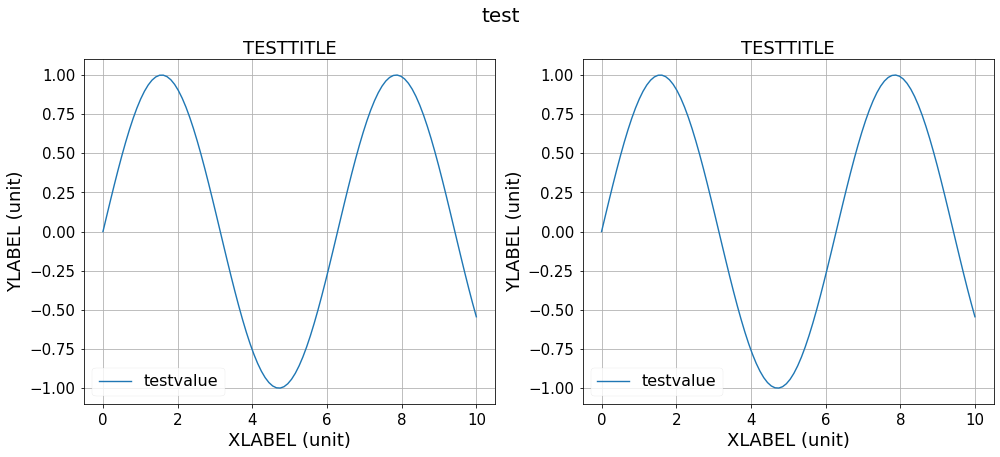

In [3]:
#Canvas for side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
fig.suptitle("test",y=1.05,fontsize=20)

axes[0].grid(True)
axes[0].plot(x,y,label="testvalue")
axes[0].legend(fontsize=16)
axes[0].set_title("TESTTITLE",fontsize=18)
axes[0].set_xlabel("XLABEL (unit)",fontsize=18)
axes[0].set_ylabel("YLABEL (unit)",fontsize=18)
axes[0].legend(fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=15)


axes[1].grid(True)
axes[1].plot(x,y,label="testvalue")
axes[1].legend(fontsize=16)
axes[1].set_title("TESTTITLE",fontsize=18)
axes[1].set_xlabel("XLABEL (unit)",fontsize=18)
axes[1].set_ylabel("YLABEL (unit)",fontsize=18)
axes[1].legend(fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.show()

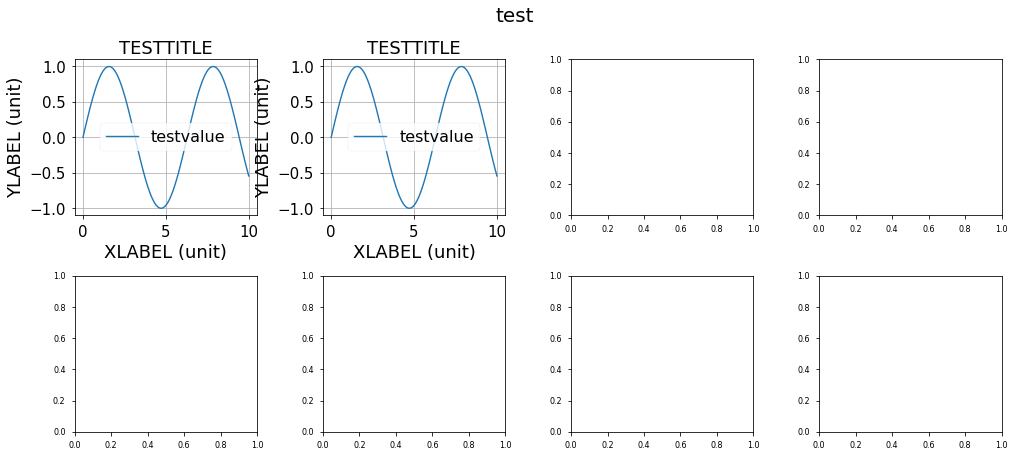

In [4]:
#Canvas for side by side
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14,6))
fig.suptitle("test",y=1.05,fontsize=20)

axes[0,0].grid(True)
axes[0,0].plot(x,y,label="testvalue")
axes[0,0].legend(fontsize=16)
axes[0,0].set_title("TESTTITLE",fontsize=18)
axes[0,0].set_xlabel("XLABEL (unit)",fontsize=18)
axes[0,0].set_ylabel("YLABEL (unit)",fontsize=18)
axes[0,0].legend(fontsize=16)
axes[0,0].tick_params(axis='both', which='major', labelsize=15)


axes[0,1].grid(True)
axes[0,1].plot(x,y,label="testvalue")
axes[0,1].legend(fontsize=16)
axes[0,1].set_title("TESTTITLE",fontsize=18)
axes[0,1].set_xlabel("XLABEL (unit)",fontsize=18)
axes[0,1].set_ylabel("YLABEL (unit)",fontsize=18)
axes[0,1].legend(fontsize=16)
axes[0,1].tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.show()

## Read data

In [5]:
#Folder and paths definitions
main_path  = os.getcwd()
datafolder_path = main_path+"/results"
results_dir = "/output_py" 
output_dir = main_path+results_dir
try:
    os.mkdir(output_dir)
except OSError:
    print ("Creation of the directory %s failed" % results_dir)
else:
    print ("Successfully created the directory %s " % results_dir)


Creation of the directory /output_py failed


In [6]:
#Simulation parameters
N = 5000
T = 10000
n_runs = 20
dt = .01
freq = "gfreq"
MF = "MF"

if(freq =="gfreq"):
    freq_plot="$\\mathcal{N}(0,1)$ natural freqs"
else:
    freq_plot="Uniformly distributed freqs $\\in[-.5,.5]$"
if(MF =="MF"):
    MF_plot="MeanField"
else:
    MF_plot="non-MeanField"


In [13]:
#OutputFileNames
#S/N --> |r(t)|/sigma(r(t))
sn_name = "S_N"
#(Mod&Phase)(t)
modphase_name = "ModPhase_t"
#Spectrum
spectrum_name = "Spectrum"
#r_inf
rinf_name = "r_inf"
#Configuration-specific name
config_name= "/N%d_nruns%d_freq=%s_"%(N,n_runs,freq)



In [19]:
#K for simulation
K_r0 = np.arange(0,1.4,.2) #da 0 a 1.2 a step di .2, note the last step is not included!
K_r1 = np.arange(1.21,2.01,.01)
K_r2 = np.arange(2.1,5.1,.1)
Kvalues = np.concatenate((K_r0,K_r1,K_r2))
Kvalues = np.unique(Kvalues, axis=0)
print(len(Kvalues))
Kvalues

117


array([0.  , 0.2 , 0.4 , 0.6 , 0.8 , 1.  , 1.2 , 1.21, 1.22, 1.23, 1.24,
       1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35,
       1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46,
       1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57,
       1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68,
       1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79,
       1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 ,
       1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.  , 2.1 ,
       2.2 , 2.3 , 2.4 , 2.5 , 2.6 , 2.7 , 2.8 , 2.9 , 3.  , 3.1 , 3.2 ,
       3.3 , 3.4 , 3.5 , 3.6 , 3.7 , 3.8 , 3.9 , 4.  , 4.1 , 4.2 , 4.3 ,
       4.4 , 4.5 , 4.6 , 4.7 , 4.8 , 4.9 , 5.  ])

In [9]:
#Create dataframe dictionary. For each entry, first value is the K of the dataframe (second value)
data = []
for i in range(0,len(Kvalues)):
    filename = datafolder_path + "/%s_uphase_N%d_%s_T%d_dt%.4f_nruns%d_K%.3f.tsv"%(freq,N,MF,T,dt,n_runs,Kvalues[i])
    #cols refers to timestep, avgmod, stdmod, avgphase,stdphase (of order parameter)
    df = pd.read_csv(filename,sep="\t",header=None)
    data.append([format(Kvalues[i],'.3f'),df])

## Plots

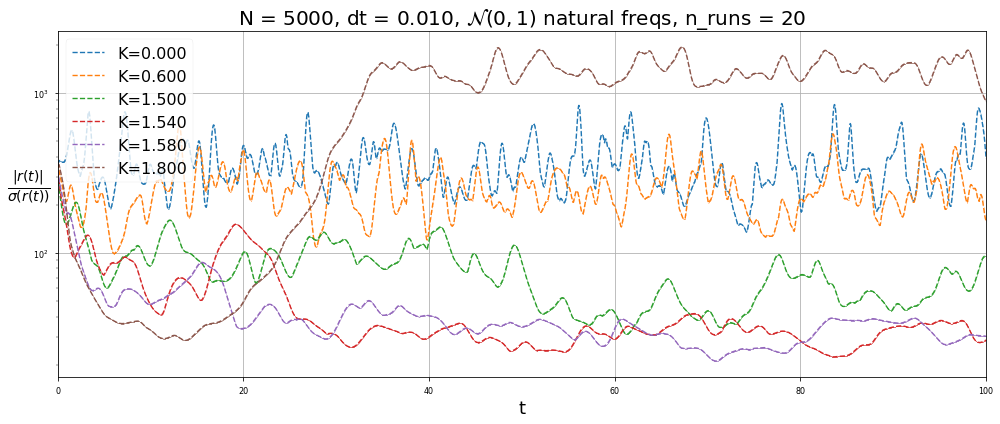

In [18]:
#Plot settings
alph = 1
tmax =100

selected_index = [0,3,17,21,25,47]
fig = plt.figure(figsize=[14,6])
plt.grid(True)
plt.title("N = %d, dt = %.3f, %s, n_runs = %d" % (N,dt,freq_plot,n_runs),fontsize=20)
for i in selected_index:
    plt.plot(data[i][1][0],data[i][1][1]/data[i][1][2],ls='--',marker='.',markersize=.5,label="K=%s"%(data[i][0]),alpha=alph)
    plt.semilogy()
    plt.legend(fontsize=16)
plt.xlabel("t",fontsize=18)
plt.ylabel("$\\frac{|r(t)|}{\\sigma(r(t))}$",fontsize=20,rotation=0)
plt.xlim(0,tmax)

fig.tight_layout()
plt.savefig(output_dir+config_name+sn_name)
plt.show()

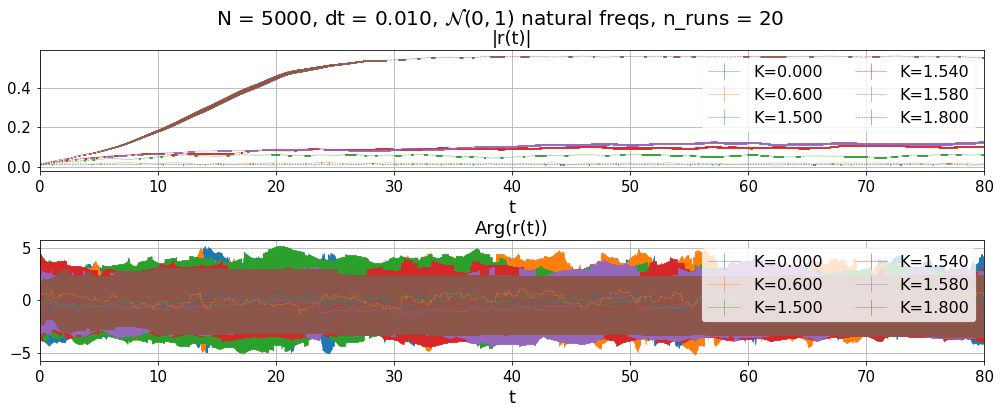

In [11]:
#Plot settings
alph = 1
tmax =80


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,6))

fig.suptitle("N = %d, dt = %.3f, %s, n_runs = %d"%(N,dt,freq_plot, n_runs),y=.95,fontsize=20)

axes[0].grid(True)

for i in selected_index:
    axes[0].errorbar(data[i][1][0],data[i][1][1],yerr=data[i][1][2],ls='--',linewidth=.5,fmt='.',markersize=.05, elinewidth=.5, capthick=.5,label="K=%s"%(data[i][0]),alpha=alph)
    axes[1].errorbar(data[i][1][0],data[i][1][3],yerr=data[i][1][4],ls='--',linewidth=.5,fmt='.',markersize=.05, elinewidth=.5, capthick=.5,label="K=%s"%(data[i][0]),alpha=alph)

axes[0].legend(fontsize=16)
axes[0].set_title("|r(t)|",fontsize=18)
axes[0].set_xlabel("t",fontsize=18)
axes[0].set_ylabel("",fontsize=18)
axes[0].legend(fontsize=16,ncol=2)
axes[0].set_xlim(0,tmax)
axes[0].tick_params(axis='both', which='major', labelsize=15)


axes[1].grid(True)
axes[1].legend(fontsize=16)
axes[1].set_title("Arg(r(t))",fontsize=18)
axes[1].set_xlabel("t",fontsize=18)
axes[1].set_ylabel("",fontsize=18)
axes[1].legend(fontsize=16,ncol=2)
axes[1].set_xlim(0,tmax)
axes[1].tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()

plt.subplots_adjust(top=.85)
plt.savefig(output_dir+config_name+modphase_name)
plt.show()

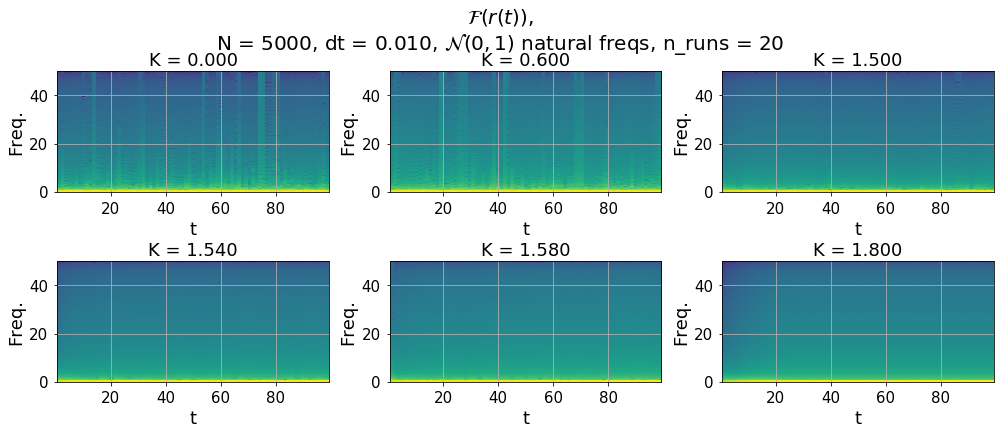

In [12]:
max_K_in_plot = 8
max_n_of_K_in_plot = 5
idx_max_K_in_plot = find_nearest(Kvalues,max_K_in_plot)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,6))
fig.suptitle("$\\mathcal{F}(r(t))$,\nN = %d, dt = %.3f, %s, n_runs = %d"%(N,dt,freq_plot, n_runs),y=1,fontsize=20)
counter1 = 0
counter2 = 0
for i in selected_index:
    if(counter1<len(selected_index)/2):
        axes[0,counter1].grid(True)
        im = axes[0,counter1].specgram(data[i][1][1],Fs=1/dt)
        axes[0,counter1].set_title("K = %s"%(data[i][0]),fontsize=18)
        axes[0,counter1].set_xlabel("t",fontsize=18)
        axes[0,counter1].set_ylabel("Freq.",fontsize=18)
        axes[0,counter1].tick_params(axis='both', which='major', labelsize=15)
        counter1 = counter1+1
    else:  
        axes[1,counter2].grid(True)
        im = axes[1,counter2].specgram(data[i][1][1],Fs=1/dt)
        axes[1,counter2].set_title("K = %s"%(data[i][0]),fontsize=18)
        axes[1,counter2].set_xlabel("t",fontsize=18)
        axes[1,counter2].set_ylabel("Freq.",fontsize=18)
        axes[1,counter2].tick_params(axis='both', which='major', labelsize=15)
        counter2 = counter2+1

fig.tight_layout()
plt.subplots_adjust(top=.85)

plt.savefig(output_dir+config_name+spectrum_name)

plt.show()



In [20]:
#for r_inf evaluation
Kval_list = []
r_inf = []
r_inf_err = []
last_percent = .9
for i in range(0,len(Kvalues)):
    r_inf.append([np.mean(data[i][1][1][int(len(data[i][1][1])*last_percent):])])
    r_inf_err.append([np.std(data[i][1][1][int(len(data[i][1][1])*last_percent):])])
    Kval_list.append([Kvalues[i]])

IndexError: list index out of range

# ADD ERRORBARS

In [ ]:

fig = plt.figure(figsize=[14,6])
plt.grid(True)
plt.title("N = %d, dt = %.3f, %s, n_runs = %d"%(N,dt,freq_plot, n_runs),y=1,fontsize=20)
#plt.errorbar(Kval_list,r_inf,y_err=r_inf_err,label="testvalue")
plt.errorbar(Kval_list,r_inf,ls='--',linewidth=.5,fmt='.',markersize=5, elinewidth=.5, capthick=.5,label="Average on last %d steps"%((1-last_percent)*T+1))
plt.legend(fontsize=16)
plt.xlabel("K",fontsize=18)
plt.ylabel("$r_{\\infty}$",fontsize=18,rotation=0)

fig.tight_layout()
plt.savefig(output_dir+config_name+rinf_name)

plt.show()